# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#funcao
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


## Primeiro caso de teste

In [202]:
#população inicial (primeira geração)
n_pop = 100
dim = 3
pop=criaPop(n_pop,dim)
pop

array([[0.38525733, 0.29266519, 0.26204946],
       [0.91614953, 0.93864832, 0.23238579],
       [0.77608379, 0.18088532, 0.83373679],
       [0.73880633, 0.37030471, 0.00811155],
       [0.59922348, 0.58032231, 0.54176752],
       [0.55331539, 0.25805991, 0.98055544],
       [0.95940006, 0.53942116, 0.57225072],
       [0.30282259, 0.52523394, 0.24085731],
       [0.14609264, 0.64868126, 0.37917904],
       [0.75630891, 0.32880032, 0.12190422],
       [0.55401035, 0.06744515, 0.00568953],
       [0.28544754, 0.71737717, 0.48127609],
       [0.47437909, 0.93306332, 0.86415431],
       [0.26959789, 0.02266637, 0.5251834 ],
       [0.64089525, 0.15192169, 0.42544699],
       [0.18133013, 0.40776187, 0.04344445],
       [0.56649684, 0.69730969, 0.84078109],
       [0.80590635, 0.5974347 , 0.6758119 ],
       [0.70389603, 0.88418379, 0.43101243],
       [0.80931492, 0.59027777, 0.36825864],
       [0.28031229, 0.90848498, 0.05162262],
       [0.53243017, 0.30534154, 0.88756722],
       [0.

In [203]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)
pop

array([[-6.88456042e-01, -2.44008849e-01,  1.57229677e+00],
       [ 2.49689720e+00,  3.63188992e+00,  1.39431471e+00],
       [ 1.65650273e+00, -9.14688052e-01,  5.00242076e+00],
       [ 1.43283799e+00,  2.21828261e-01,  4.86692926e-02],
       [ 5.95340876e-01,  1.48193386e+00,  3.25060514e+00],
       [ 3.19892341e-01, -4.51640555e-01,  5.88333263e+00],
       [ 2.75640033e+00,  1.23652698e+00,  3.43350435e+00],
       [-1.18306446e+00,  1.15140366e+00,  1.44514387e+00],
       [-2.12344419e+00,  1.89208759e+00,  2.27507423e+00],
       [ 1.53785346e+00, -2.71981070e-02,  7.31425317e-01],
       [ 3.24062114e-01, -1.59532908e+00,  3.41371565e-02],
       [-1.28731476e+00,  2.30426300e+00,  2.88765654e+00],
       [-1.53725467e-01,  3.59837995e+00,  5.18492587e+00],
       [-1.38241267e+00, -1.86400177e+00,  3.15110039e+00],
       [ 8.45371520e-01, -1.08846986e+00,  2.55268192e+00],
       [-1.91201924e+00,  4.46571218e-01,  2.60666689e-01],
       [ 3.98981043e-01,  2.18385811e+00

In [204]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)
pop

array([[-6.88456042e-01, -2.44008849e-01,  1.57229677e+00,
         1.90370448e+02],
       [ 2.49689720e+00,  3.63188992e+00,  1.39431471e+00,
         1.53015064e+02],
       [ 1.65650273e+00, -9.14688052e-01,  5.00242076e+00,
         2.94508755e+02],
       [ 1.43283799e+00,  2.21828261e-01,  4.86692926e-02,
         3.26421970e+02],
       [ 5.95340876e-01,  1.48193386e+00,  3.25060514e+00,
         8.88942881e+00],
       [ 3.19892341e-01, -4.51640555e-01,  5.88333263e+00,
         3.74244504e+02],
       [ 2.75640033e+00,  1.23652698e+00,  3.43350435e+00,
         4.81450227e+01],
       [-1.18306446e+00,  1.15140366e+00,  1.44514387e+00,
         1.34587347e+02],
       [-2.12344419e+00,  1.89208759e+00,  2.27507423e+00,
         1.13557459e+02],
       [ 1.53785346e+00, -2.71981070e-02,  7.31425317e-01,
         2.39476439e+02],
       [ 3.24062114e-01, -1.59532908e+00,  3.41371565e-02,
         5.26987016e+02],
       [-1.28731476e+00,  2.30426300e+00,  2.88765654e+00,
      

In [205]:
#ordenação
pop_ord = pop[pop[0:, -1].argsort()]
pop_ord

array([[ 7.03879110e-01,  1.50914354e+00,  3.09315979e+00,
         5.95603957e+00],
       [ 5.95340876e-01,  1.48193386e+00,  3.25060514e+00,
         8.88942881e+00],
       [ 6.25872037e-01,  2.73690543e+00,  3.36286133e+00,
         1.62103600e+01],
       [ 2.46804546e+00,  1.77514081e+00,  3.11133362e+00,
         2.29346630e+01],
       [-6.02738660e-01,  2.13850628e+00,  3.02996957e+00,
         2.60983372e+01],
       [ 1.85588954e+00,  1.54166665e+00,  2.20955183e+00,
         3.02711075e+01],
       [ 1.22337618e+00,  3.30510276e+00,  2.58607461e+00,
         3.97048602e+01],
       [ 2.78911392e+00,  2.69496847e+00,  3.11816343e+00,
         4.20877877e+01],
       [ 1.83543808e+00,  1.58460821e+00,  4.05487138e+00,
         4.38131834e+01],
       [ 2.75640033e+00,  1.23652698e+00,  3.43350435e+00,
         4.81450227e+01],
       [-1.28731476e+00,  2.30426300e+00,  2.88765654e+00,
         5.45482389e+01],
       [ 1.79486419e+00,  7.17998248e-01,  3.82613220e+00,
      

In [206]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]
melhor_pop_inicial

array([[ 7.03879110e-01,  1.50914354e+00,  3.09315979e+00,
         5.95603957e+00],
       [ 5.95340876e-01,  1.48193386e+00,  3.25060514e+00,
         8.88942881e+00],
       [ 6.25872037e-01,  2.73690543e+00,  3.36286133e+00,
         1.62103600e+01],
       [ 2.46804546e+00,  1.77514081e+00,  3.11133362e+00,
         2.29346630e+01],
       [-6.02738660e-01,  2.13850628e+00,  3.02996957e+00,
         2.60983372e+01],
       [ 1.85588954e+00,  1.54166665e+00,  2.20955183e+00,
         3.02711075e+01],
       [ 1.22337618e+00,  3.30510276e+00,  2.58607461e+00,
         3.97048602e+01],
       [ 2.78911392e+00,  2.69496847e+00,  3.11816343e+00,
         4.20877877e+01],
       [ 1.83543808e+00,  1.58460821e+00,  4.05487138e+00,
         4.38131834e+01],
       [ 2.75640033e+00,  1.23652698e+00,  3.43350435e+00,
         4.81450227e+01],
       [-1.28731476e+00,  2.30426300e+00,  2.88765654e+00,
         5.45482389e+01],
       [ 1.79486419e+00,  7.17998248e-01,  3.82613220e+00,
      

In [207]:
#contagem de população estagnada
cont = 0
delta = 0.01

Número de iterações para a convergência:  99


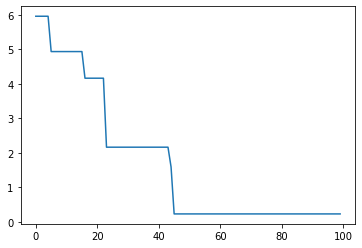

In [216]:
melhor_i=[]
sem_evoluir = 100
i_desejadas = 5

#while i_desejadas > 0:
    
for i in range(sem_evoluir):
    #segunda geracao
    if i==0:
        nova_melhor_pop = melhor_pop_inicial.copy()

        #novos 50% da população
        nova_pop = criaPop(int(n_pop/2),dim)

        #converter para as faixas
        nova_pop = converter1(nova_pop)

        #fitness da nova população
        nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

        #melhor 50% pop anterior + 50% nova população
        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        #reordena
        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]

        #melhor fit dessa geração
        melhor_i.append(melhor_pop[0:1,-1])

    #gerações posteriores
    elif i>0:
        nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

        nova_pop = criaPop(int(n_pop/2),dim)

        nova_pop = converter1(nova_pop)

        nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]

        #melhores fits da geração
        melhor_i.append(melhor_pop[0:1,-1])

        evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

        if evolucao <= delta:
            cont += 1

        elif evolucao >= delta:
            cont=0

        elif evolucao == cont:
            break

print('Número de iterações para a convergência: ',i)

#i_desejadas -= 1

#media e desvio padrao dos fits
media = sum(melhor_i)/len(melhor_i)
desvioP = np.std(melhor_i,axis=0)
melhor_i = np.array(melhor_i)
plt.plot(melhor_i)
#melhor_i.shape

[Início](#Índice)

## Segundo caso de teste

In [245]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [246]:
tamanho_2 = palavraAlvo.size
dim_2 = 1

In [247]:
def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [248]:
#palavra aleatoria
palavra = [converter2(criaPop(tamanho_2,dim_2))]
palavra

[array([123.14204659, 124.66372597, 112.70818473,  75.87812399,
         93.13742765, 116.42585792,  58.04078175,  97.310226  ,
         57.58014596,  73.02834668,  82.96968783,  66.37227796,
        103.18725135,  95.39916421,  67.93183428, 111.96823018,
         81.92653361,  67.05302893,  78.284241  , 120.80087755,
         91.18095435,  69.82770794,  84.53435777,  77.32086001,
        124.20021176,  75.29500427,  76.09101225,  79.94494185,
         77.81881445,  92.77317543])]

In [249]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T
palavra

array([[ 123.14204659, 4983.6606033 ],
       [ 124.66372597, 5200.82216519],
       [ 112.70818473, 3619.36814848],
       [  75.87812399,  544.34134685],
       [  93.13742765, 1647.58281705],
       [ 116.42585792, 4080.50848903],
       [  58.04078175,   30.18163789],
       [  97.310226  , 2003.74640158],
       [  57.58014596,   25.3325583 ],
       [  73.02834668,  419.48556164],
       [  82.96968783,  925.53993478],
       [  66.37227796,  191.13831064],
       [ 103.18725135, 2564.43505682],
       [  95.39916421, 1836.30797786],
       [  67.93183428,  236.69312571],
       [ 111.96823018, 3530.88259602],
       [  81.92653361,  863.15699507],
       [  67.05302893,  210.42487521],
       [  78.284241  ,  662.40557425],
       [ 120.80087755, 4658.59180021],
       [  91.18095435, 1492.58242841],
       [  69.82770794,  298.6228669 ],
       [  84.53435777, 1023.19105693],
       [  77.32086001,  613.74413999],
       [ 124.20021176, 5134.18275494],
       [  75.29500427,  5

In [250]:
#ordenar
palavra_ord = palavra[palavra[0:, -1].argsort()]
#50% melhores
melhor_palavra = palavra_ord[0:int(tamanho_2/2),:]
melhor_palavra

array([[ 57.58014596,  25.3325583 ],
       [ 58.04078175,  30.18163789],
       [ 66.37227796, 191.13831064],
       [ 67.05302893, 210.42487521],
       [ 67.93183428, 236.69312571],
       [ 69.82770794, 298.6228669 ],
       [ 73.02834668, 419.48556164],
       [ 75.29500427, 517.47169824],
       [ 75.87812399, 544.34134685],
       [ 76.09101225, 554.32051268],
       [ 77.32086001, 613.74413999],
       [ 77.81881445, 638.66460551],
       [ 78.284241  , 662.40557425],
       [ 79.94494185, 750.64721771],
       [ 81.92653361, 863.15699507]])

In [ ]:
#contagem de geração estagnada
cont_2 = 0
delta_2 = 0.01

[Início](#Índice)<br>

## Terceiro caso de teste